Importing Necessary Libraries

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

Importing All The Datasets

In [21]:
email_table = pd.read_csv('email_table.csv')
email_opened_table = pd.read_csv('email_opened_table.csv')
link_clicked_table = pd.read_csv('link_clicked_table.csv')

Adding the target columns

In [22]:
email_table['opened'] = email_table['email_id'].isin(email_opened_table['email_id']).astype(int)
email_table['clicked'] = email_table['email_id'].isin(link_clicked_table['email_id']).astype(int)


OneHot Encoding

In [23]:
categorical_cols = ['email_text', 'email_version', 'weekday', 'user_country']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(email_table[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

c:\Users\haris\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
processed_data = pd.concat([
    email_table[['hour', 'user_past_purchases', 'opened', 'clicked']].reset_index(drop=True),
    encoded_df
], axis=1)

X = processed_data.drop('clicked', axis=1)
y = processed_data['clicked']

Spliting the Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [26]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("\nBalanced Model Classification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score (Balanced): {auc:.3f}")



Balanced Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29364
           1       0.23      0.27      0.25       636

    accuracy                           0.97     30000
   macro avg       0.61      0.62      0.61     30000
weighted avg       0.97      0.97      0.97     30000

ROC-AUC Score (Balanced): 0.920


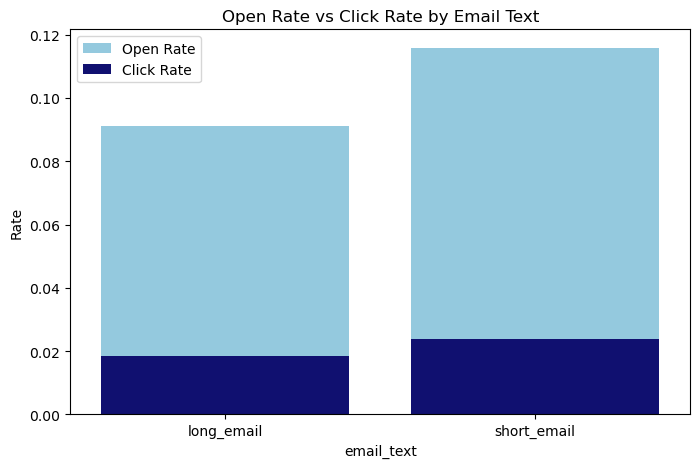

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

email_table['clicked'] = email_table['email_id'].isin(link_clicked_table['email_id']).astype(int)
email_table['opened'] = email_table['email_id'].isin(email_opened_table['email_id']).astype(int)

agg = email_table.groupby('email_text').agg({
    'opened': 'mean',
    'clicked': 'mean'
}).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='email_text', y='opened', data=agg, color='skyblue', label='Open Rate')
sns.barplot(x='email_text', y='clicked', data=agg, color='navy', label='Click Rate')

plt.title('Open Rate vs Click Rate by Email Text')
plt.ylabel('Rate')
plt.legend()
plt.show()


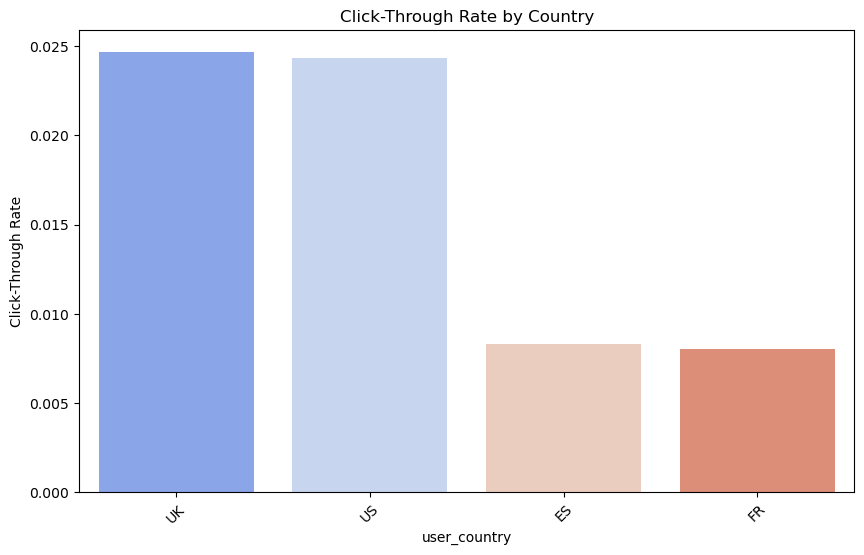

In [30]:
country_ctr = email_table.groupby('user_country')['clicked'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=country_ctr.index, y=country_ctr.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.ylabel('Click-Through Rate')
plt.title('Click-Through Rate by Country')
plt.show()


c:\Users\haris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


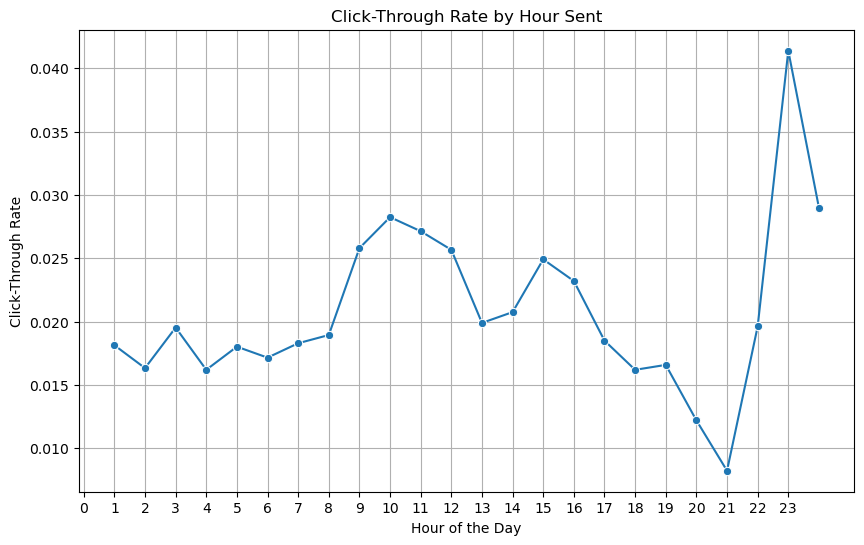

In [31]:
hour_ctr = email_table.groupby('hour')['clicked'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=hour_ctr.index, y=hour_ctr.values, marker='o')
plt.xticks(range(0,24))
plt.ylabel('Click-Through Rate')
plt.xlabel('Hour of the Day')
plt.title('Click-Through Rate by Hour Sent')
plt.grid(True)
plt.show()


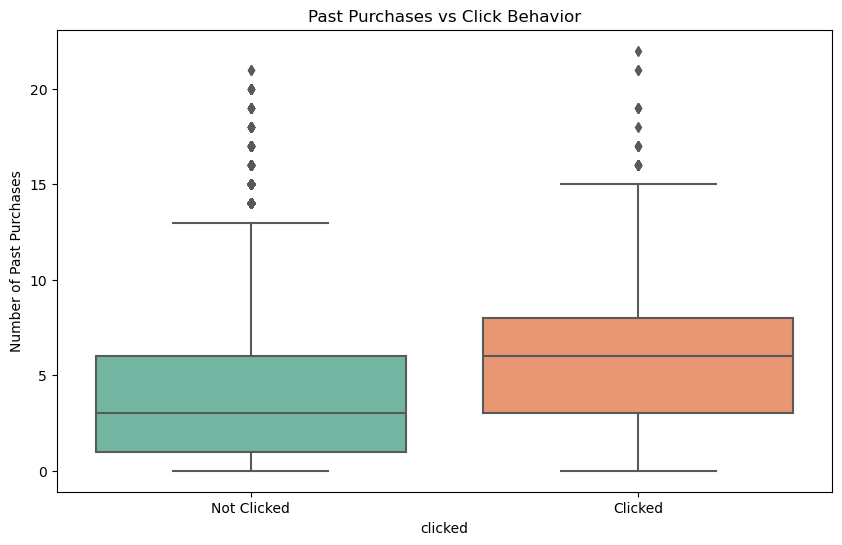

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='clicked', y='user_past_purchases', data=email_table, palette='Set2')
plt.xticks([0, 1], ['Not Clicked', 'Clicked'])
plt.title('Past Purchases vs Click Behavior')
plt.ylabel('Number of Past Purchases')
plt.show()
